In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from xgboost import XGBRegressor, XGBClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive/")

In [ ]:
# Load the datasets
df_2023 = pd.read_csv('/content/employee-compensation-2023.csv')
df_2022 = pd.read_csv('/content/employee-compensation-2022.csv')

In [ ]:
df_2021 = pd.read_csv('/content/employee-compensation-2021.csv', encoding='ISO-8859-1')
df_2020 = pd.read_csv('/content/employee-compensation-2020.csv', encoding='ISO-8859-1')
df_2019 = pd.read_csv('/content/employee-compensation-2019.csv', encoding='ISO-8859-1')
df_2018 = pd.read_csv('/content/employee-compensation-2018.csv', encoding='ISO-8859-1')
df_2017 = pd.read_csv('/content/employee-compensation-2017.csv', encoding='ISO-8859-1')

In [ ]:
# Add year columns
df_2023['Year'] = 2023
df_2022['Year'] = 2022
df_2021['Year'] = 2021
df_2020['Year'] = 2020
df_2019['Year'] = 2019
df_2018['Year'] = 2018
df_2017['Year'] = 2017

In [ ]:
# Rename Job Title columns
df_2023.rename(columns={'Job Title (as of 12/31/23)': 'Job Title'}, inplace=True)
df_2022.rename(columns={'Job Title (as of 12/31/22)': 'Job Title'}, inplace=True)
df_2021.rename(columns={'Job Title (as of 12/31/21)': 'Job Title'}, inplace=True)
df_2020.rename(columns={'Job Title (as of 12/31/20)': 'Job Title'}, inplace=True)
df_2019.rename(columns={'Job Title (as of 12/31/19)': 'Job Title'}, inplace=True)
df_2018.rename(columns={'Job Title (as of 12/31/18)': 'Job Title'}, inplace=True)
df_2017.rename(columns={'Job Title (as of 12/31/17)': 'Job Title'}, inplace=True)

In [ ]:
def clean_and_analyze_dataframe(df):
    # Print the dimensions of the dataframe before cleaning
    dimensions = df.shape
    print(f"Number of rows: {dimensions[0]}")
    print(f"Number of columns: {dimensions[1]}")

    if 'Retirement Contributions (Normal Cost) - City Paid*' in df.columns:
        df.rename(columns={'Retirement Contributions (Normal Cost) - City Paid*': 'Retirement Contributions (Normal Cost) - City Paid'}, inplace=True)


    # Drop specified columns
    columns_to_drop = [
        'Name', 'Department', 'Sick and Vacation Payouts', 'Other Cash Compensation',
        'Defined Contribution Plan Contributions - City Paid', 'Medical Dental Vision',
        'Retirement Contributions (Normal Cost) - City Paid',
        'Long Term Disability, Life, Medicare', 'Misc Employment Related Costs'
    ]
    df.drop(columns_to_drop, axis=1, inplace=True)

    # Define the columns to clean and convert to float
    columns_to_clean = [
        'Total Cash Compensation', 'Base Pay', 'Overtime'
    ]

    # Remove commas, dollar signs, and spaces, and convert columns to float
    for column in columns_to_clean:
        df[column] = df[column].astype(str).str.replace('[\$,]', '', regex=True).str.strip()
        df[column] = pd.to_numeric(df[column], errors='coerce')

    # Verify the data type of each column
    data_types = df[columns_to_clean].dtypes
    print("Data types after cleaning:")
    print(data_types)

    # Check for missing values in the dataframe
    missing_values_count = df.isnull().sum()
    print("Missing values in each column before dropping NaNs:")
    print(missing_values_count)

    # Remove rows where 'Base Pay' is NaN or less than or equal to 0
    df_cleaned = df.dropna(subset=['Base Pay'])
    df_cleaned = df_cleaned[df_cleaned['Base Pay'] > 0]

    # Fill missing values in 'Overtime' column with 0
    df_cleaned['Overtime'].fillna(0, inplace=True)

    # Check for missing values after cleaning
    missing_values_count = df_cleaned.isnull().sum()
    print("Missing values in each column after cleaning:")
    print(missing_values_count)

    # Calculate the hourly rate and add it as a new column 'HourlyRate'
    df_cleaned['HourlyRate'] = df_cleaned['Base Pay'] / (40 * 52)

    # Count the number of rows where 'HourlyRate' is 0
    num_hourly_rate_zero = (df_cleaned['HourlyRate'] == 0).sum()
    print(f"Number of rows where HourlyRate is 0: {num_hourly_rate_zero}")

    # Calculate the hours worked as overtime and add it as a new column 'Hours Worked Overtime'
    df_cleaned['Hours Worked Overtime'] = df_cleaned['Overtime'] / df_cleaned['HourlyRate']

    # Calculate the 45th and 80th percentiles of 'Hours Worked Overtime'
    percentile_45 = df_cleaned['Hours Worked Overtime'].quantile(0.45)
    percentile_80 = df_cleaned['Hours Worked Overtime'].quantile(0.80)

    # Categorize based on the percentiles
    def categorize_stress_level(hours):
        if hours < percentile_45:
            return 'Low Stress'
        elif hours <= percentile_80:
            return 'Medium Stress'
        else:
            return 'High Stress'

    # Apply the categorization function
    df_cleaned['Stress Level'] = df_cleaned['Hours Worked Overtime'].apply(categorize_stress_level)

    # Display the counts for 'High Stress', 'Medium Stress', and 'Low Stress'
    stress_level_counts = df_cleaned['Stress Level'].value_counts()
    print("Stress Level counts:")
    print(stress_level_counts)

    # df_cleaned['Stress Index'] = (df_cleaned['Hours Worked Overtime'] / df_cleaned['Base Pay']) + df_cleaned['Hours Worked Overtime']




    return df_cleaned

In [ ]:
df_2023_cleaned = clean_and_analyze_dataframe(df_2023)
df_2022_cleaned = clean_and_analyze_dataframe(df_2022)
df_2021_cleaned = clean_and_analyze_dataframe(df_2021)
df_2020_cleaned = clean_and_analyze_dataframe(df_2020)
df_2019_cleaned = clean_and_analyze_dataframe(df_2019)
df_2018_cleaned = clean_and_analyze_dataframe(df_2018)
df_2017_cleaned = clean_and_analyze_dataframe(df_2017)


Number of rows: 8646
Number of columns: 14
Data types after cleaning:
Total Cash Compensation    float64
Base Pay                   float64
Overtime                   float64
dtype: object
Missing values in each column before dropping NaNs:
Job Title                     0
Total Cash Compensation       0
Base Pay                     65
Overtime                   3831
Year                          0
dtype: int64
Missing values in each column after cleaning:
Job Title                  0
Total Cash Compensation    0
Base Pay                   0
Overtime                   0
Year                       0
dtype: int64
Number of rows where HourlyRate is 0: 0
Stress Level counts:
Stress Level
Low Stress       3855
Medium Stress    2998
High Stress      1713
Name: count, dtype: int64
Number of rows: 8475
Number of columns: 14
Data types after cleaning:
Total Cash Compensation    float64
Base Pay                   float64
Overtime                   float64
dtype: object
Missing values in each colu

<ipython-input-17-881b09ccefba>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Overtime'].fillna(0, inplace=True)
<ipython-input-17-881b09ccefba>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Stress Level counts:
Stress Level
Medium Stress    6478
High Stress      1620
Name: count, dtype: int64
Number of rows: 8173
Number of columns: 14
Data types after cleaning:
Total Cash Compensation    float64
Base Pay                   float64
Overtime                   float64
dtype: object
Missing values in each column before dropping NaNs:
Job Title                     0
Total Cash Compensation       0
Base Pay                     58
Overtime                   3870
Year                          0
dtype: int64
Missing values in each column after cleaning:
Job Title                  0
Total Cash Compensation    0
Base Pay                   0
Overtime                   0
Year                       0
dtype: int64
Number of rows where HourlyRate is 0: 0
Stress Level counts:
Stress Level
Medium Stress    6486
High Stress      1622
Low Stress          1
Name: count, dtype: int64
Number of rows: 8554
Number of columns: 14
Data types after cleaning:
Total Cash Compensation    float64
Base Pa

<ipython-input-17-881b09ccefba>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Overtime'].fillna(0, inplace=True)
<ipython-input-17-881b09ccefba>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_combined = pd.concat([df_2023_cleaned, df_2022_cleaned, df_2021_cleaned, df_2020_cleaned, df_2019_cleaned, df_2018_cleaned, df_2017_cleaned], ignore_index=True)


In [ ]:
df_combined.shape

(58006, 8)

In [ ]:
missing_values_count = df_combined.isnull().sum()

# Display the result
print(missing_values_count)

Job Title                  0
Total Cash Compensation    0
Base Pay                   0
Overtime                   0
Year                       0
HourlyRate                 0
Hours Worked Overtime      0
Stress Level               0
dtype: int64


In [ ]:
job_title_counts = df_combined['Job Title'].value_counts()
print("Unique job titles and their counts:")
print(job_title_counts)

Unique job titles and their counts:
Job Title
Police Officer                    6098
Recreation Leader PT              5439
Fire Fighter                      1643
School Crossing Guard PT          1643
Fire Engineer                     1595
                                  ... 
Reg Wastewater Fac Gen Mgr U         1
Council ComnRel Director U PT        1
Literacy Program Specialist PT       1
Assist City Auditor U                1
Real Estate Specialist               1
Name: count, Length: 637, dtype: int64


In [ ]:
df_combined.head()

,Job Title,Total Cash Compensation,Base Pay,Overtime,Year,HourlyRate,Hours Worked Overtime,Stress Level
0,Fire Captain,620986.55,180574.29,436373.06,2023,86.814563,5026.496102,High Stress
1,Fire Captain,505127.13,180574.29,309358.34,2023,86.814563,3563.438334,High Stress
2,Police Lieutenant,457417.50,201148.00,218841.40,2023,96.705769,2262.961163,High Stress
3,Fire Engineer,453006.39,157370.85,291596.34,2023,75.659063,3854.083442,High Stress
4,Fire Engineer,446067.98,157370.85,287852.25,2023,75.659063,3804.597103,High Stress


In [ ]:
# Remove rows where 'Job Title' ends with ' U'
df_combined = df_combined[~df_combined['Job Title'].str.contains(r' U| U ', na=False)]

In [ ]:
df_combined.head()

,Job Title,Total Cash Compensation,Base Pay,Overtime,Year,HourlyRate,Hours Worked Overtime,Stress Level
0,Fire Captain,620986.55,180574.29,436373.06,2023,86.814563,5026.496102,High Stress
1,Fire Captain,505127.13,180574.29,309358.34,2023,86.814563,3563.438334,High Stress
2,Police Lieutenant,457417.50,201148.00,218841.40,2023,96.705769,2262.961163,High Stress
3,Fire Engineer,453006.39,157370.85,291596.34,2023,75.659063,3854.083442,High Stress
4,Fire Engineer,446067.98,157370.85,287852.25,2023,75.659063,3804.597103,High Stress


In [ ]:
from google.colab import files

df_combined.to_csv('df_combined.csv', index = False)
files.download('df_combined.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
job_title_counts = df_combined['Job Title'].value_counts()
# job_titles_more_than_100 = job_title_counts[job_title_counts > 100]
# print(job_titles_more_than_100)

job_titles_more_than_100 = job_title_counts[job_title_counts > 100].index
df_filtered = df_combined[df_combined['Job Title'].isin(job_titles_more_than_100)]


df_filtered.to_csv('df_filtered.csv', index = False)
files.download('df_filtered.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_filtered

df_filtered.shape

(41753, 9)

In [3]:
# Create sample dataset
# data = df_filtered
data = pd.read_csv("df_filtered.csv") 

# Load the inflation data
inflation_data = pd.read_excel('inflationData.xlsx')

# Extract the numeric inflation data starting from row 12 onward
inflation_data_cleaned = inflation_data.iloc[11:, :].reset_index(drop=True)

# Rename the columns to make them more accessible
columns = inflation_data_cleaned.iloc[0]
inflation_data_cleaned.columns = columns
inflation_data_cleaned = inflation_data_cleaned.iloc[1:].reset_index(drop=True)

# Convert the year columns to numeric, and drop any non-numeric rows
inflation_data_cleaned = inflation_data_cleaned.apply(pd.to_numeric, errors='coerce')
inflation_data_cleaned = inflation_data_cleaned.dropna().reset_index(drop=True)

# Calculate the average annual inflation rate for each year
inflation_data_cleaned['Average Inflation'] = inflation_data_cleaned.iloc[:, 1:].mean(axis=1)

# Extract year and average inflation for integration into the model
inflation_rates = inflation_data_cleaned[['Year', 'Average Inflation']]

# Merge the inflation rates with the original dataset
data = data.merge(inflation_rates, left_on='Year', right_on='Year', how='left')

# Display the first few rows of the dataset
print("Dataset Preview:")
display(data.head())

Dataset Preview:


/Users/mac/Desktop/cmpe255_project/env/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Job Title,Total Cash Compensation,Base Pay,Overtime,Year,HourlyRate,Hours Worked Overtime,Stress Level,Job Title Encoded,Average Inflation
0,Fire Captain,620986.55,180574.29,436373.06,2023,86.814563,5026.496102,High Stress,26,0.383333
1,Fire Captain,505127.13,180574.29,309358.34,2023,86.814563,3563.438334,High Stress,26,0.383333
2,Police Lieutenant,457417.50,201148.00,218841.40,2023,96.705769,2262.961163,High Stress,57,0.383333
3,Fire Engineer,453006.39,157370.85,291596.34,2023,75.659063,3854.083442,High Stress,27,0.383333
4,Fire Engineer,446067.98,157370.85,287852.25,2023,75.659063,3804.597103,High Stress,27,0.383333


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

class CompensationPredictor:
    def __init__(self):
        self.comp_model = RandomForestRegressor(random_state=42)
        self.trend_model = LinearRegression()
        self.poly = PolynomialFeatures(degree=2)  # Using polynomial regression for non-linear trends
        self.stress_model = RandomForestClassifier(random_state=42)
        self.scaler = StandardScaler()
        self.job_title_encoder = LabelEncoder()
        self.stress_encoder = LabelEncoder()

    def prepare_data(self, data):
        """Prepare the dataset for training"""
        # Encode Job Title as a numerical feature
        data['Job Title Encoded'] = self.job_title_encoder.fit_transform(data['Job Title'])

        # Create features (Job Title, Year, and Inflation)
        features = data[['Job Title Encoded', 'Year', 'Average Inflation']].copy()

        # Create targets
        comp_target = data['Total Cash Compensation']
        stress_target = self.stress_encoder.fit_transform(data['Stress Level'])

        # Scale features except Year (keeping the original Year feature)
        scaled_features = features.copy()
        scaled_features[['Job Title Encoded', 'Average Inflation']] = self.scaler.fit_transform(
            features[['Job Title Encoded', 'Average Inflation']]
        )

        return scaled_features, features['Year'], comp_target, stress_target

    def train(self, data):
        """Train both compensation and stress level models"""
        # Prepare data
        X, years, y_comp, y_stress = self.prepare_data(data)

        # Apply polynomial transformation to the Year feature for trend analysis
        years_poly = self.poly.fit_transform(years.values.reshape(-1, 1))

        # Train trend model (polynomial regression for year vs. compensation)
        self.trend_model.fit(years_poly, y_comp)

        # Add trend predictions as a feature to X
        trend_predictions = self.trend_model.predict(years_poly)
        X_with_trend = np.hstack((X, trend_predictions.reshape(-1, 1)))

        # Split data
        X_train, X_test, y_comp_train, y_comp_test, y_stress_train, y_stress_test = train_test_split(
            X_with_trend, y_comp, y_stress, test_size=0.2, random_state=42
        )

        # Train compensation model
        self.comp_model.fit(X_train, y_comp_train)
        comp_pred = self.comp_model.predict(X_test)
        comp_rmse = np.sqrt(mean_squared_error(y_comp_test, comp_pred))

        # Train stress level model
        self.stress_model.fit(X_train, y_stress_train)
        stress_pred = self.stress_model.predict(X_test)
        stress_report = classification_report(y_stress_test, stress_pred)

        return {
            'compensation_rmse': comp_rmse,
            'stress_classification_report': stress_report
        }

    def predict(self, job_title, year, inflation=None):
        """Make predictions for new data based on job title, year, and inflation"""
        # Encode the job title input
        job_title_encoded = self.job_title_encoder.transform([job_title])[0]

        # If inflation is not provided, use the most recent available inflation rate
        if inflation is None:
            inflation = inflation_rates[inflation_rates['Year'] == inflation_rates['Year'].max()]['Average Inflation'].values[0]

        # Apply polynomial transformation to the Year feature for trend prediction
        year_poly = self.poly.transform([[year]])

        # Predict trend for the given year using polynomial regression
        trend_pred = self.trend_model.predict(year_poly)

        # Prepare input data with trend prediction as a feature
        input_data = np.array([[job_title_encoded, year, inflation]])
        scaled_input = input_data.copy()
        scaled_input[:, [0, 2]] = self.scaler.transform(input_data[:, [0, 2]])
        input_with_trend = np.hstack((scaled_input, trend_pred.reshape(-1, 1)))

        # Make predictions using RandomForest
        rf_pred = self.comp_model.predict(input_with_trend)[0]

        # Combine the trend prediction and RandomForest prediction with dynamic weighting
        final_pred = 0.3 * trend_pred[0] + 0.7 * rf_pred  # Adjust weights as necessary to give more influence to RandomForest

        # Predict stress level
        stress_pred = self.stress_model.predict(input_with_trend)[0]
        stress_label = self.stress_encoder.inverse_transform([stress_pred])[0]

        return {
            'predicted_compensation': final_pred,
            'predicted_stress_level': stress_label
        }

# Initialize and train the hybrid model
predictor = CompensationPredictor()
metrics = predictor.train(data)

print("\nModel Performance Metrics:")
print(f"Compensation RMSE: ${metrics['compensation_rmse']:.2f}")
print("\nStress Level Classification Report:")
print(metrics['stress_classification_report'])

# Make a prediction for 2025 with inflation value
inflation_rate = inflation_rates[inflation_rates['Year'] == 2023]['Average Inflation'].values[0]  # Use the latest inflation rate as a proxy
prediction = predictor.predict(
    job_title='Police Lieutenant',
    year=2022,
    inflation=inflation_rate
)

print("\nPrediction for 2025:")
print(f"Predicted Compensation: ${prediction['predicted_compensation']:.2f}")
print(f"Predicted Stress Level: {prediction['predicted_stress_level']}")

# Create a function to make interactive predictions
def make_prediction():
    job_title = input("Enter job title (e.g., Fire Captain): ")
    year = int(input("Enter year (e.g., 2024): "))
    inflation = float(input("Enter expected inflation rate for the year (e.g., 3.0): "))

    prediction = predictor.predict(job_title, year, inflation)
    print(f"\nPredicted Compensation: ${prediction['predicted_compensation']:.2f}")
    print(f"Predicted Stress Level: {prediction['predicted_stress_level']}")


Model Performance Metrics:
Compensation RMSE: $31365.93

Stress Level Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      2047
           1       0.73      0.86      0.79      1416
           2       0.87      0.72      0.79      4888

    accuracy                           0.77      8351
   macro avg       0.75      0.80      0.76      8351
weighted avg       0.79      0.77      0.77      8351


Prediction for 2025:
Predicted Compensation: $225622.37
Predicted Stress Level: High Stress


/Users/mac/Desktop/cmpe255_project/env/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:

# Initialize and train the hybrid model
predictor = CompensationPredictor()
metrics = predictor.train(data)

print("\nModel Performance Metrics:")
print(f"Compensation RMSE: ${metrics['compensation_rmse']:.2f}")
print("\nStress Level Classification Report:")
print(metrics['stress_classification_report'])

# Make a prediction for 2025 with inflation value
inflation_rate = inflation_rates[inflation_rates['Year'] == 2023]['Average Inflation'].values[0]  # Use the latest inflation rate as a proxy
prediction = predictor.predict(
    job_title='Police Lieutenant',
    year=2022,
    inflation=inflation_rate
)

print("\nPrediction for 2025:")
print(f"Predicted Compensation: ${prediction['predicted_compensation']:.2f}")
print(f"Predicted Stress Level: {prediction['predicted_stress_level']}")

# Create a function to make interactive predictions
def make_prediction():
    job_title = input("Enter job title (e.g., Fire Captain): ")
    year = int(input("Enter year (e.g., 2024): "))
    inflation = float(input("Enter expected inflation rate for the year (e.g., 3.0): "))

    prediction = predictor.predict(job_title, year, inflation)
    print(f"\nPredicted Compensation: ${prediction['predicted_compensation']:.2f}")
    print(f"Predicted Stress Level: {prediction['predicted_stress_level']}")




Model Performance Metrics:
Compensation RMSE: $31365.93

Stress Level Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      2047
           1       0.73      0.86      0.79      1416
           2       0.87      0.72      0.79      4888

    accuracy                           0.77      8351
   macro avg       0.75      0.80      0.76      8351
weighted avg       0.79      0.77      0.77      8351


Prediction for 2025:
Predicted Compensation: $225622.37
Predicted Stress Level: High Stress


/Users/mac/Desktop/cmpe255_project/env/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
import joblib

# Initialize and train the hybrid model
predictor = CompensationPredictor()
metrics = predictor.train(data)

print("\nModel Performance Metrics:")
print(f"Compensation RMSE: ${metrics['compensation_rmse']:.2f}")
print("\nStress Level Classification Report:")
print(metrics['stress_classification_report'])

# Make a prediction for 2025 with inflation value
inflation_rate = inflation_rates[inflation_rates['Year'] == 2023]['Average Inflation'].values[0]  # Use the latest inflation rate as a proxy
prediction = predictor.predict(
    job_title='Police Lieutenant',
    year=2022,
    inflation=inflation_rate
)

print("\nPrediction for 2025:")
print(f"Predicted Compensation: ${prediction['predicted_compensation']:.2f}")
print(f"Predicted Stress Level: {prediction['predicted_stress_level']}")

# Create a function to make interactive predictions
def make_prediction():
    job_title = input("Enter job title (e.g., Fire Captain): ")
    year = int(input("Enter year (e.g., 2024): "))
    inflation = float(input("Enter expected inflation rate for the year (e.g., 3.0): "))

    prediction = predictor.predict(job_title, year, inflation)
    print(f"\nPredicted Compensation: ${prediction['predicted_compensation']:.2f}")
    print(f"Predicted Stress Level: {prediction['predicted_stress_level']}")

# Save the RandomForest models to .pkl files
joblib.dump(predictor.comp_model, 'compensation_model.pkl')
joblib.dump(predictor.stress_model, 'stress_model.pkl')
joblib.dump(predictor.job_title_encoder, 'job_title_encoder.pkl')
joblib.dump(predictor.stress_encoder, 'stress_encoder.pkl')
joblib.dump(predictor.scaler, 'scaler.pkl')

print("Models saved successfully.")



Model Performance Metrics:
Compensation RMSE: $31365.93

Stress Level Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      2047
           1       0.73      0.86      0.79      1416
           2       0.87      0.72      0.79      4888

    accuracy                           0.77      8351
   macro avg       0.75      0.80      0.76      8351
weighted avg       0.79      0.77      0.77      8351


Prediction for 2025:
Predicted Compensation: $225622.37
Predicted Stress Level: High Stress
Models saved successfully.


/Users/mac/Desktop/cmpe255_project/env/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
#hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint, uniform
import numpy as np

class TunedCompensationPredictor(CompensationPredictor):
    def __init__(self):
        super().__init__()
        
        # Define parameter grids for both models
        self.comp_param_grid = {
            'n_estimators': [100, 200, 300, 500],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False]
        }
        
        self.stress_param_grid = {
            'n_estimators': [100, 200, 300, 500],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False],
            'class_weight': ['balanced', 'balanced_subsample', None]
        }

    def tune_models(self, data, cv=5, n_iter=50, search_type='random'):
        """Tune both models using either RandomizedSearchCV or GridSearchCV"""
        # Prepare data
        X, years, y_comp, y_stress = self.prepare_data(data)
        years_poly = self.poly.fit_transform(years.values.reshape(-1, 1))
        self.trend_model.fit(years_poly, y_comp)
        trend_predictions = self.trend_model.predict(years_poly)
        X_with_trend = np.hstack((X, trend_predictions.reshape(-1, 1)))

        # Initialize search method
        if search_type == 'random':
            comp_search = RandomizedSearchCV(
                RandomForestRegressor(random_state=42),
                self.comp_param_grid,
                n_iter=n_iter,
                cv=cv,
                verbose=1,
                n_jobs=-1,
                random_state=42
            )
            stress_search = RandomizedSearchCV(
                RandomForestClassifier(random_state=42),
                self.stress_param_grid,
                n_iter=n_iter,
                cv=cv,
                verbose=1,
                n_jobs=-1,
                random_state=42
            )
        else:
            comp_search = GridSearchCV(
                RandomForestRegressor(random_state=42),
                self.comp_param_grid,
                cv=cv,
                verbose=1,
                n_jobs=-1
            )
            stress_search = GridSearchCV(
                RandomForestClassifier(random_state=42),
                self.stress_param_grid,
                cv=cv,
                verbose=1,
                n_jobs=-1
            )

        # Fit the searches
        print("Tuning compensation model...")
        comp_search.fit(X_with_trend, y_comp)
        print("\nTuning stress model...")
        stress_search.fit(X_with_trend, y_stress)

        # Update models with best parameters
        self.comp_model = comp_search.best_estimator_
        self.stress_model = stress_search.best_estimator_

        return {
            'compensation_best_params': comp_search.best_params_,
            'compensation_best_score': comp_search.best_score_,
            'stress_best_params': stress_search.best_params_,
            'stress_best_score': stress_search.best_score_,
            'compensation_cv_results': comp_search.cv_results_,
            'stress_cv_results': stress_search.cv_results_
        }

    def analyze_feature_importance(self, feature_names=None):
        """Analyze feature importance for both models"""
        if feature_names is None:
            feature_names = ['Job Title', 'Year', 'Average Inflation', 'Trend']

        comp_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': self.comp_model.feature_importances_
        }).sort_values('importance', ascending=False)

        stress_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': self.stress_model.feature_importances_
        }).sort_values('importance', ascending=False)

        return comp_importance, stress_importance

# Usage example
tuned_predictor = TunedCompensationPredictor()
tuning_results = tuned_predictor.tune_models(data, cv=5, n_iter=50, search_type='random')

# Print results
print("\nBest Parameters for Compensation Model:")
print(tuning_results['compensation_best_params'])
print(f"Best Score: {tuning_results['compensation_best_score']:.4f}")

print("\nBest Parameters for Stress Model:")
print(tuning_results['stress_best_params'])
print(f"Best Score: {tuning_results['stress_best_score']:.4f}")

# Analyze feature importance
comp_importance, stress_importance = tuned_predictor.analyze_feature_importance()
print("\nFeature Importance for Compensation Model:")
print(comp_importance)
print("\nFeature Importance for Stress Model:")
print(stress_importance)

# Make predictions with tuned model
inflation_rate = inflation_rates[inflation_rates['Year'] == 2023]['Average Inflation'].values[0]
prediction = tuned_predictor.predict(
    job_title='Police Lieutenant',
    year=2024,
    inflation=inflation_rate
)

print("\nPrediction with Tuned Model:")
print(f"Predicted Compensation: ${prediction['predicted_compensation']:.2f}")
print(f"Predicted Stress Level: {prediction['predicted_stress_level']}")

Tuning compensation model...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Tuning stress model...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters for Compensation Model:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
Best Score: 0.4485

Best Parameters for Stress Model:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': False}
Best Score: 0.5163

Feature Importance for Compensation Model:
             feature  importance
0          Job Title    0.974266
3              Trend    0.011853
1               Year    0.011529
2  Average Inflation    0.002352

Feature Importance for Stress Model:
             feature  importance
0          Job Title    0.657558
2  Average Inflation    0.324820
3              Trend    0.009047
1               Year    0.008575

Prediction

/Users/mac/Desktop/cmpe255_project/env/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Compensation Model Comparison:
Metric              Original        Tuned  Improvement
-------------------------------------------------------
RMSE                31365.93     31197.20        0.54%
R2                      0.83         0.83        0.22%
MAE                 19167.57     19075.33       -0.48%

Stress Classification Comparison:

Original Model Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      2047
           1       0.73      0.86      0.79      1416
           2       0.87      0.72      0.79      4888

    accuracy                           0.77      8351
   macro avg       0.75      0.80      0.76      8351
weighted avg       0.79      0.77      0.77      8351


Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.92      0.73      2047
           1       0.67      0.94      0.78      1416
           2       0.95      0.63     

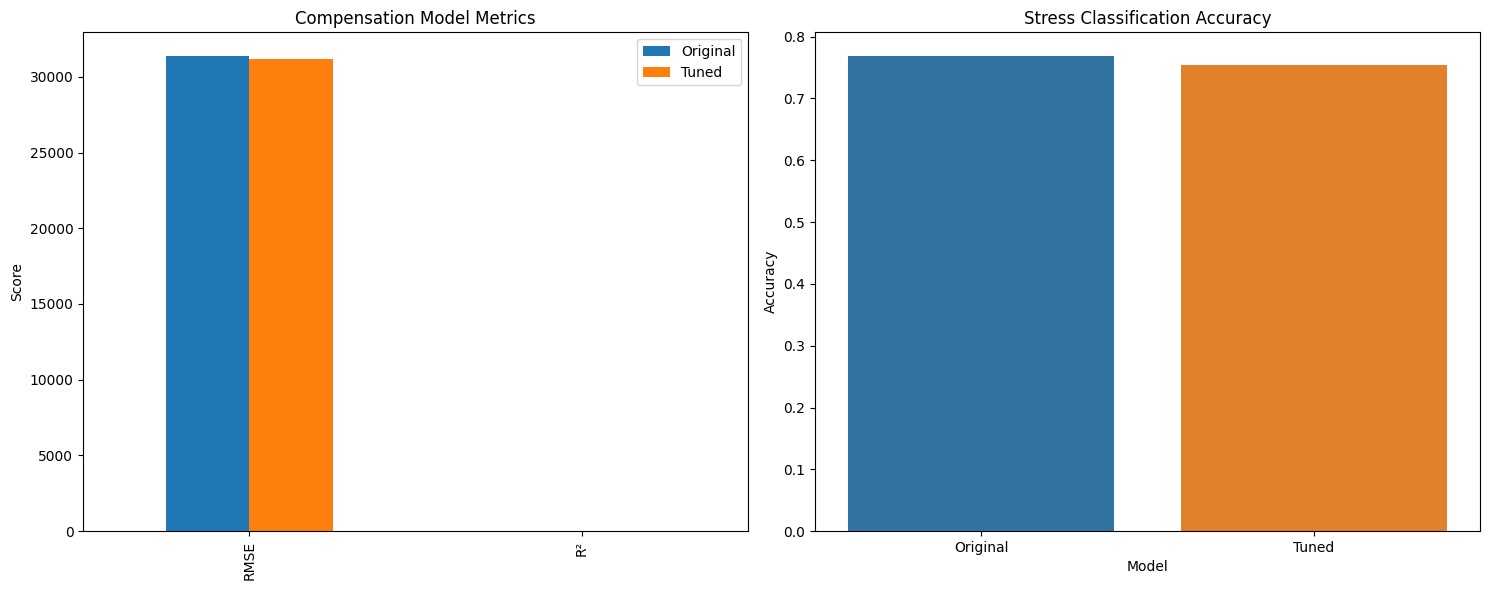

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

def compare_models(original_predictor, tuned_predictor, data, test_size=0.2):
    """Compare performance of original and tuned models"""
    
    # Prepare data
    X, years, y_comp, y_stress = original_predictor.prepare_data(data)
    
    # Fit and get polynomial features and trend predictions
    years_poly = original_predictor.poly.fit_transform(years.values.reshape(-1, 1))
    original_predictor.trend_model.fit(years_poly, y_comp)  # Fit the trend model first
    trend_predictions = original_predictor.trend_model.predict(years_poly)
    X_with_trend = np.hstack((X, trend_predictions.reshape(-1, 1)))
    
    # Split data
    X_train, X_test, y_comp_train, y_comp_test, y_stress_train, y_stress_test = train_test_split(
        X_with_trend, y_comp, y_stress, test_size=test_size, random_state=42
    )
    
    # Train and predict with original model
    original_predictor.comp_model.fit(X_train, y_comp_train)
    original_predictor.stress_model.fit(X_train, y_stress_train)
    
    orig_comp_pred = original_predictor.comp_model.predict(X_test)
    orig_stress_pred = original_predictor.stress_model.predict(X_test)
    
    # Use already tuned model for predictions
    tuned_comp_pred = tuned_predictor.comp_model.predict(X_test)
    tuned_stress_pred = tuned_predictor.stress_model.predict(X_test)
    
    # Calculate metrics
    results = {
        'original': {
            'compensation': {
                'rmse': np.sqrt(mean_squared_error(y_comp_test, orig_comp_pred)),
                'r2': r2_score(y_comp_test, orig_comp_pred),
                'mae': np.mean(np.abs(y_comp_test - orig_comp_pred))
            },
            'stress': {
                'accuracy': accuracy_score(y_stress_test, orig_stress_pred),
                'report': classification_report(y_stress_test, orig_stress_pred)
            }
        },
        'tuned': {
            'compensation': {
                'rmse': np.sqrt(mean_squared_error(y_comp_test, tuned_comp_pred)),
                'r2': r2_score(y_comp_test, tuned_comp_pred),
                'mae': np.mean(np.abs(y_comp_test - tuned_comp_pred))
            },
            'stress': {
                'accuracy': accuracy_score(y_stress_test, tuned_stress_pred),
                'report': classification_report(y_stress_test, tuned_stress_pred)
            }
        }
    }
    
    # Print results
    print("\nCompensation Model Comparison:")
    print(f"{'Metric':<15} {'Original':>12} {'Tuned':>12} {'Improvement':>12}")
    print("-" * 55)
    for metric in ['rmse', 'r2', 'mae']:
        orig = results['original']['compensation'][metric]
        tuned = results['tuned']['compensation'][metric]
        improvement = ((tuned - orig) / orig * 100) if metric != 'rmse' else ((orig - tuned) / orig * 100)
        print(f"{metric.upper():<15} {orig:>12.2f} {tuned:>12.2f} {improvement:>11.2f}%")
    
    print("\nStress Classification Comparison:")
    print("\nOriginal Model Classification Report:")
    print(results['original']['stress']['report'])
    print("\nTuned Model Classification Report:")
    print(results['tuned']['stress']['report'])
    
    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Compensation metrics comparison
    metrics_df = pd.DataFrame({
        'Original': [results['original']['compensation']['rmse'],
                    results['original']['compensation']['r2']],
        'Tuned': [results['tuned']['compensation']['rmse'],
                  results['tuned']['compensation']['r2']]
    }, index=['RMSE', 'R²'])
    
    metrics_df.plot(kind='bar', ax=ax1)
    ax1.set_title('Compensation Model Metrics')
    ax1.set_ylabel('Score')
    
    # Stress accuracy comparison
    accuracies = pd.DataFrame({
        'Model': ['Original', 'Tuned'],
        'Accuracy': [results['original']['stress']['accuracy'],
                    results['tuned']['stress']['accuracy']]
    })
    sns.barplot(x='Model', y='Accuracy', data=accuracies, ax=ax2)
    ax2.set_title('Stress Classification Accuracy')
    
    plt.tight_layout()
    plt.show()
    
    return results

# Run comparison
original_predictor = CompensationPredictor()
comparison_results = compare_models(original_predictor, tuned_predictor, data)